### Creating Plots for the Watertank case study

First import all required libraries

In [82]:
import matplotlib.pylab as plt
import numpy as np

Read in data from file. We assume that each line in the file contains a sequence of Boolean values, all sequences are expected to have the same length. 

In [83]:
# open file
file = open("experiment_1/adaptationInvocations", 'r')
#file = open("adaptationInvocations", 'r')
#file = open("baseControllerInvocations", 'r')

# read in files
invocations = []
for line in file:
    # filter out empty strings
    str_list = list(filter(lambda p : p!='\n', line.split(",")))
    invocations.append(str_list)

   

For a fixed window-size we compute the number of occurrences of "1", i.e., the number of cases per window in which the base controller was invoked. Use matplotlib to visualize the results

Slope should be -0.08478260869565221
Averages: p=0.9239130434782613, u=1.3478260869565224 at points 20 and 15, average should be one at 19.10256410256411
Slope should be -0.08043478260869577
Averages: p=0.8260869565217398, u=1.2282608695652186 at points 145 and 140, average should be one at 142.83783783783784
Slope should be -0.1978260869565219
Averages: p=0.010869565217391304, u=1.0000000000000009 at points 175 and 170, average should be one at 170.0
Slope should be -0.28043478260869537
Averages: p=0.8913043478260873, u=2.293478260869564 at points 220 and 215, average should be one at 219.6124031007752
Slope should be -0.05869565217391313
Averages: p=0.7173913043478264, u=1.010869565217392 at points 305 and 300, average should be one at 300.1851851851852
Slope should be -0.5782608695652179
Averages: p=0.40217391304347805, u=3.2934782608695676 at points 455 and 450, average should be one at 453.9661654135338
[  0  25  50  75 100 125 150 175 200 225 250 275 300 325 350 375 400 425
 450 

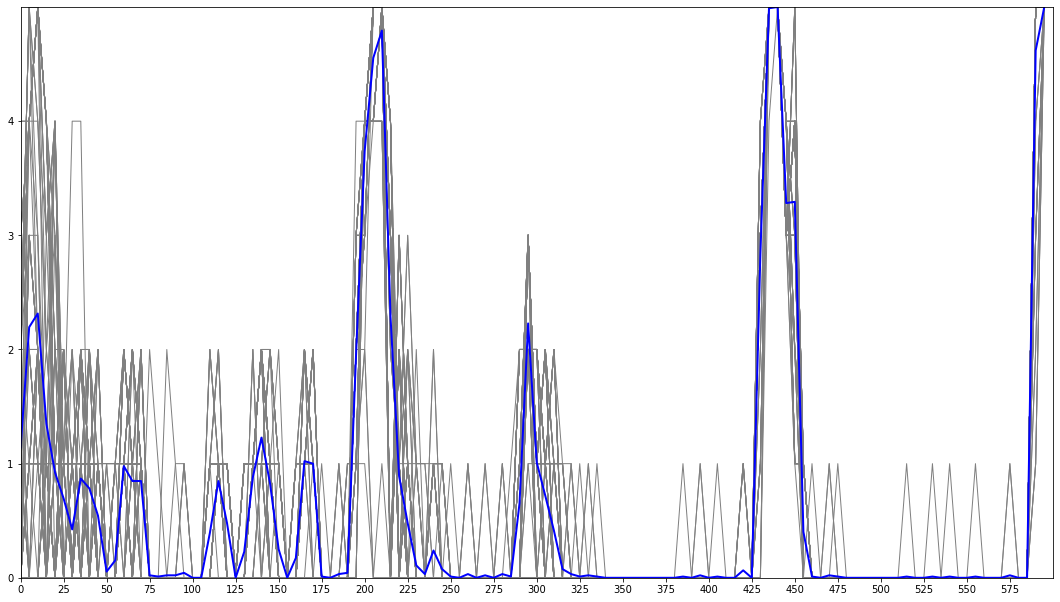

Slope should be -0.11195652173913058
Averages: p=0.20652173913043476, u=1.3260869565217406 at points 50 and 40, average should be one at 42.91262135922331
Slope should be -0.0956521739130434
Averages: p=0.8695652173913052, u=1.8260869565217392 at points 70 and 60, average should be one at 68.63636363636364
Slope should be -0.07608695652173933
Averages: p=0.47826086956521713, u=1.2391304347826104 at points 120 and 110, average should be one at 113.14285714285715
Slope should be -0.18043478260869567
Averages: p=0.2499999999999999, u=2.0543478260869565 at points 150 and 140, average should be one at 145.8433734939759
Slope should be -0.09782608695652181
Averages: p=0.03260869565217391, u=1.010869565217392 at points 180 and 170, average should be one at 170.11111111111111
Slope should be -0.12282608695652183
Averages: p=0.14130434782608692, u=1.3695652173913053 at points 230 and 220, average should be one at 223.00884955752213
Slope should be -0.12391304347826086
Averages: p=0.489130434782

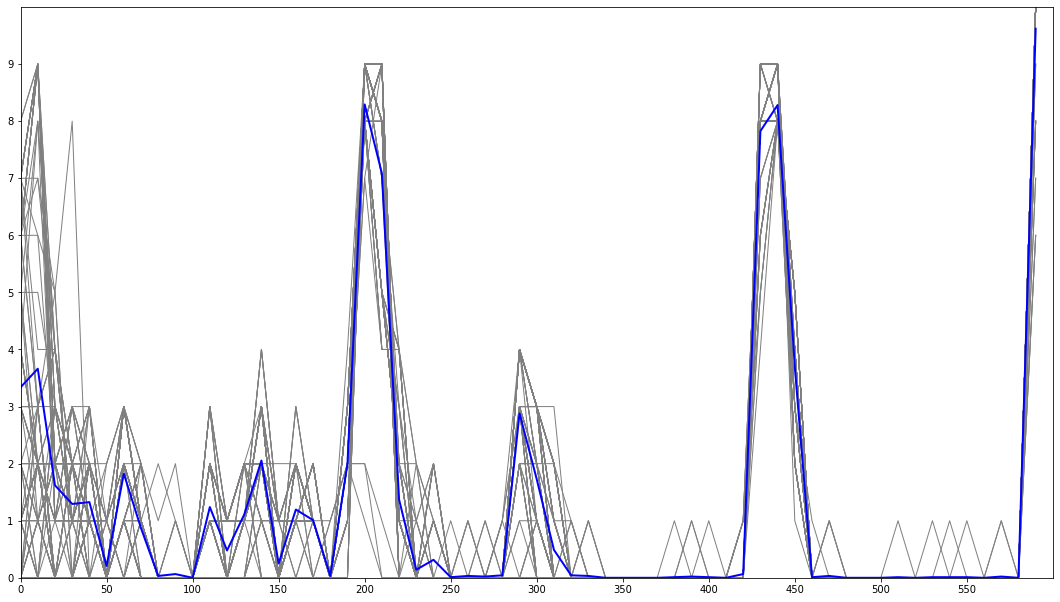

Slope should be -0.08840579710144932
Averages: p=0.7500000000000003, u=2.07608695652174 at points 45 and 30, average should be one at 42.17213114754099
Slope should be -0.1746376811594203
Averages: p=0.05434782608695652, u=2.673913043478261 at points 75 and 60, average should be one at 69.5850622406639
Slope should be -0.03550724637681169
Averages: p=0.706521739130435, u=1.2391304347826104 at points 120 and 105, average should be one at 111.73469387755105
Slope should be -0.16739130434782615
Averages: p=0.42391304347826064, u=2.9347826086956528 at points 150 and 135, average should be one at 146.55844155844156
Slope should be -0.1304347826086957
Averages: p=0.07608695652173914, u=2.0326086956521747 at points 180 and 165, average should be one at 172.91666666666666
Slope should be -0.4905797101449278
Averages: p=0.6195652173913043, u=7.978260869565221 at points 225 and 210, average should be one at 224.2245199409158
Slope should be -0.13478260869565217
Averages: p=0.11956521739130434, u

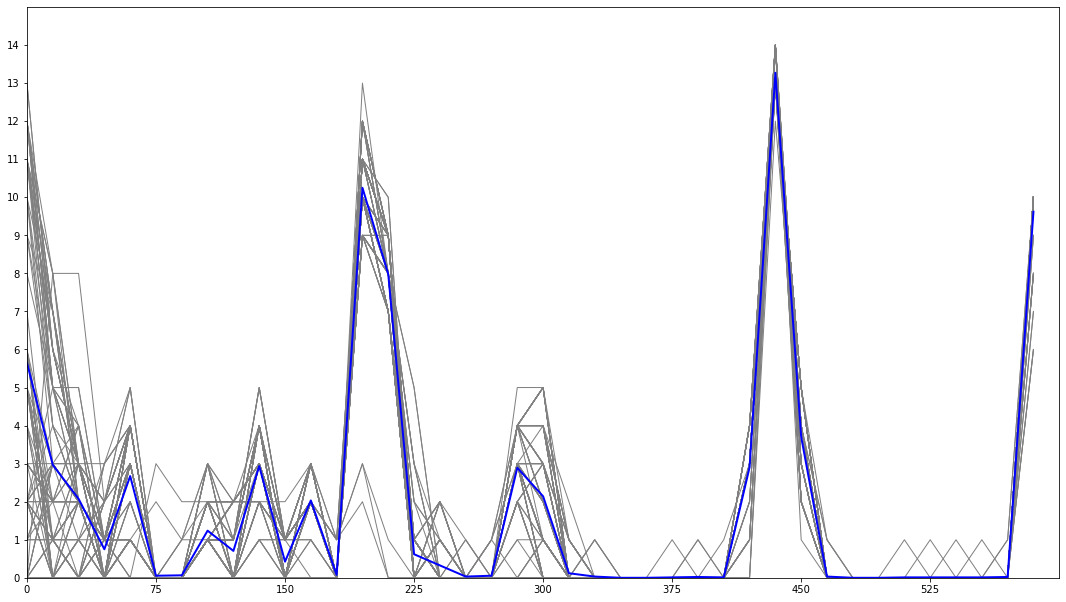

Slope should be -0.12989130434782611
Averages: p=0.09782608695652173, u=2.695652173913044 at points 80 and 60, average should be one at 73.05439330543933
Slope should be -0.05923913043478268
Averages: p=0.326086956521739, u=1.5108695652173927 at points 240 and 220, average should be one at 228.6238532110092
Slope should be -0.10706521739130434
Averages: p=0.07608695652173914, u=2.217391304347826 at points 320 and 300, average should be one at 311.3705583756345
Slope should be -0.5967391304347829
Averages: p=0.043478260869565216, u=11.978260869565222 at points 460 and 440, average should be one at 458.39708561020035
[  0 100 200 300 400 500]


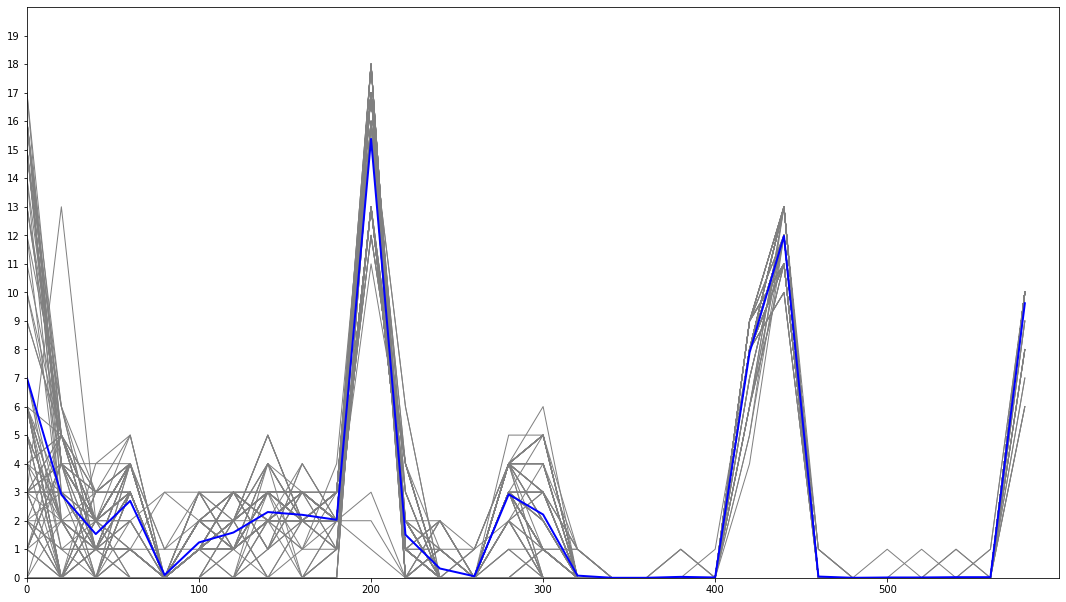

In [84]:
for window in (5,10,15,20):
    numberClusters = int(len(invocations[0])/window) + (len(invocations[0]) % window > 0)
    #print("use " + str(numberClusters) + " cluster")
    frequencies = []
    average = [0 for i in range(numberClusters)]
    for i in range(len(invocations)):
        frequencies.append([])
    
        for j in range(numberClusters):
            frequencies[i].append(invocations[i][j*window : (j+1)*window].count('1'))
            average[j] = average[j] + frequencies[i][j]/len(invocations)

            #print("add frequency " + str(frequencies[i][j]) + " which contributes by " + str(average[j]) + " to the average.")

    for j in range(len(average)):
        if j>1 and average[j] < 1 and average[j-1] > 1:
            # find point where the average drops below 1/window
            p = average[j]
            u = average[j-1]
            slope = (p-u)/window
            print("Slope should be " + str(slope))
            
            off = (1-u)/slope + (j-1)*window
            print("Averages: p=" + str(p) + ", u=" + str(u) + " at points " + str(j*window) + " and " + str((j-1)*window) + ", average should be one at " + str(off))

    #plt.style.use('_mpl-gallery')
    fig, ax = plt.subplots()
    fig.set_size_inches(18.5, 10.5, forward=True)

    for i in range(len(frequencies)):
        ax.plot(range(len(frequencies[i])), frequencies[i], linewidth=1.0, color="gray")
        
    ax.plot(range(len(average)), average, linewidth=2.0, color="blue")

    ax.set(xlim=(0, len(frequencies[0])), ylim=(0, window), yticks=np.arange(0, window))

    plt.xticks(np.arange(0, len(frequencies[0]), 5), np.arange(0, 600, 5*window))
    print(str(np.arange(0, 600, 5*window)))

    plt.show()